<a href="https://colab.research.google.com/github/blu-geek/Demo/blob/main/Tourism_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Background and Context

As a Data Scientist for a tourism company named "Visit with us",The Policy Maker of the company has mandated that I come up with a viable business model that seeks to expand the customer base of the company.To provoke this possibility, we will have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.


### Objective

To predict which customer is more likely to purchase the newly introduced travel package.

### Data Dictionary

##### Customer details:

1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

##### Customer interaction data: 

17. PitchSatisfactionScore: Sales pitch satisfaction score
18. ProductPitched: Product pitched by the salesperson
19. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
20. DurationOfPitch: Duration of the pitch by a salesperson to the customer


### Import necessary Libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [ ]:
tdata = pd.read_excel("Tourism.xlsx")

In [ ]:
# copying data to another variable to avoid any changes to original data
df=tdata.copy()

### View the first and last 5 rows of the dataset.

In [ ]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
df.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### Understand the shape of the dataset.

In [ ]:
df.shape

(4888, 20)

* The dataset has 4888 rows and 20 columns of data

### Check the data types of the columns for the dataset.

In [ ]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

**Observations -**
* We can convert the object type columns to categories.
* Also note that CityTier,Passport,PreferredPropertyStar and Owncar will equally be converted to category.
* Note also that our Target variable being, ProdTaken,a class variable , will be converted to a categorical variable since its a pure classification problem

`converting "objects" to "category" reduces the data space required to store the dataframe`

### Fixing the data types

In [ ]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [ ]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [ ]:
## Also fixing CityTier,PreferredPropertyStar,Passport and Owncar along with ProdTaken

df.PreferredPropertyStar = df.PreferredPropertyStar.astype('category')
df.CityTier = df.CityTier.astype('category')
df.Passport = df.Passport.astype('category')
df.OwnCar = df.OwnCar.astype('category')
df.ProdTaken = df.ProdTaken.astype('category')

In [ ]:
df.dtypes # to establish conversion

CustomerID                     int64
ProdTaken                   category
Age                          float64
TypeofContact               category
CityTier                    category
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar       category
MaritalStatus               category
NumberOfTrips                float64
Passport                    category
PitchSatisfactionScore         int64
OwnCar                      category
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

In [ ]:
df.ProdTaken.value_counts() # To confirm the balance in the dataset by variable of interest.

0    3968
1     920
Name: ProdTaken, dtype: int64

In [ ]:
## Validating the class distribution in Percentages
n_true = len(df.loc[df['ProdTaken'] == 1])
n_false = len(df.loc[df['ProdTaken'] == 0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 920 (18.82%)
Number of false cases: 3968 (81.18%)


In [ ]:
df.sample(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
12,200012,0,31.0,Self Enquiry,1,32.0,Salaried,Male,2,3.0,Basic,3.0,Married,2.0,0,3,0,1.0,Executive,17911.0
3262,203262,0,32.0,Company Invited,3,27.0,Salaried,Male,4,2.0,Basic,3.0,Divorced,2.0,0,5,1,2.0,Executive,21469.0
2026,202026,0,53.0,Self Enquiry,1,12.0,Salaried,Male,2,3.0,Deluxe,3.0,Single,3.0,0,5,1,1.0,Manager,17450.0
1936,201936,0,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Married,1.0,0,5,1,2.0,AVP,31595.0
3851,203851,0,25.0,Self Enquiry,1,7.0,Salaried,Male,3,5.0,Deluxe,3.0,Unmarried,3.0,0,3,1,2.0,Manager,23295.0
446,200446,0,41.0,Company Invited,3,16.0,Salaried,Male,2,3.0,Deluxe,3.0,Single,1.0,0,2,0,1.0,Manager,21230.0
320,200320,0,27.0,Self Enquiry,3,NaN,Salaried,Male,3,3.0,Deluxe,3.0,Single,2.0,1,4,1,2.0,Manager,NaN
3487,203487,0,54.0,Self Enquiry,1,9.0,Small Business,Male,3,2.0,Super Deluxe,4.0,Single,6.0,0,1,1,NaN,AVP,35276.0
4569,204569,0,34.0,Self Enquiry,2,10.0,Salaried,Male,3,4.0,Basic,4.0,Married,5.0,1,5,0,2.0,Executive,20955.0
4570,204570,1,33.0,Self Enquiry,1,32.0,Salaried,Male,3,4.0,Basic,3.0,Unmarried,3.0,1,5,0,1.0,Executive,21473.0


### Check Missing Values in Dataset

In [ ]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

### Let us fix the Missing Values

In [ ]:
# We will replace missing values in the numerical columns with its medain
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

In [ ]:
# Dropping Rows with missing values in categorical columns
df = df.dropna()

In [ ]:
# Reconfirming Presence of missing values
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

** There are no more missing valiues in the new dataset

In [ ]:
# Reconfirming new shape of dataset
df.shape

(4837, 20)

** We now have 4837 Rows and 20 Columns

In [ ]:
# Dropping the CustomerID as it is of no significance to our analysis or modelling
df.drop('CustomerID', inplace=True, axis=1) # Dropping the Customer ID as it is of no significane in our analysis

### Summary of the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4837.0,37.516229,9.069167,18.0,31.0,36.0,43.0,61.0
DurationOfPitch,4837.0,15.380401,8.336915,5.0,9.0,13.0,19.0,127.0
NumberOfPersonVisiting,4837.0,2.904900,0.724191,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4837.0,3.708910,0.994832,1.0,3.0,4.0,4.0,6.0
NumberOfTrips,4837.0,3.224933,1.820483,1.0,2.0,3.0,4.0,22.0
PitchSatisfactionScore,4837.0,3.076907,1.366123,1.0,2.0,3.0,4.0,5.0
NumberOfChildrenVisiting,4837.0,1.183998,0.850758,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4837.0,23473.475088,5070.791604,1000.0,20470.0,22347.0,25374.0,98678.0


### Observations

*  Age of the employees range from 18 to 61 years and the average age is 37 years.
*  The Duration of Pitch averages 15 with clear outliers as a result of the wide range from 5 to 127
*  Approximately 3 People on the average go on trips with customers of Visit with Us and infact 75% of the customers have 3 or less going on trips with them
*  A mean of approximately 3 followups are engaged after the initial sales pitch with 75% of the customers requiring    followups or less to secure a subscription
*  The wide range in the number of trips made by customers clearly speaks to outliers with a minimum of 1 and a maximum of 22 trips. This is even as the mean trips by customers  peak at 3
* Clearly over 75% of the customers scored 4 or less using the pitch satisfaction index with majority averaging 3. It clearly implies not every good pitch score guarantees a subscription
*  On the average, only 1 child seeks to make a trip with a customer.
*  Monthly Income has a high range and the difference in mean and median indicate the presence of outliers.

In [ ]:
df.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4837,2,0,3926
TypeofContact,4837,2,Self Enquiry,3422
CityTier,4837,3,1,3155
Occupation,4837,4,Salaried,2347
Gender,4837,3,Male,2887
ProductPitched,4837,5,Basic,1831
PreferredPropertyStar,4837,3,3,2974
MaritalStatus,4837,4,Married,2311
Passport,4837,2,0,3422
OwnCar,4837,2,1,2995


### Observation

*  3926 customers did not subscribe to any package or take any Product
*  Majority of the customers (3422) made contact with Visit with Us through Self Enquiry
*  3155 customers come from Tier 1 cities which are highly developed and with the highest living standards
*  About 2347 customers are Salaried with a Job apparently
*  Majority of the customers are made up of males. 2887 of them. Its interesting to note here that Gender can only be male or female, but the unique value here speaks to a third. we will investigate this further
*  1831 of the customers had the Basic package pitched to them during sales 
*  3 star properties were most preferred by 2974 customers 
*  There are 2311 Married customers as well as 1831 executives among the customers who are Executives.

**Let's look at the unqiue values of all the categories**

In [ ]:
cols_cat= df.select_dtypes(['category'])

In [ ]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in ProdTaken are :
0    3926
1     911
Name: ProdTaken, dtype: int64
**************************************************
Unique values in TypeofContact are :
Self Enquiry       3422
Company Invited    1415
Name: TypeofContact, dtype: int64
**************************************************
Unique values in CityTier are :
1    3155
3    1487
2     195
Name: CityTier, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2347
Small Business    2056
Large Business     432
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2887
Female     1795
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1831
Deluxe          1716
Standard         741
Super Deluxe     342
King             207
Name: ProductPitched, dtype: int64
************

#### Fixing unusual unique values in columns of interest Gender and MaritalStaus

In [ ]:
# We can see that the odd text 'Fe male' which accounts for the 3rd Gender of interest
# Let us fix it
df.Gender = df.Gender.replace('Fe Male', 'Female')
df.Gender.unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [ ]:
# We can also see that Marital Status has Singles and Unmarried. Umarried may speak to a LiveInPartner who is not married
# So let us replace Unmarried with LiveInPartner
df.MaritalStatus = df.MaritalStatus.replace('Unmarried','LiveInPartner')
df.MaritalStatus.unique()

['Single', 'Divorced', 'Married', 'LiveInPartner']
Categories (4, object): ['Single', 'Divorced', 'Married', 'LiveInPartner']

### Exploratory Data Analysis ( EDA)

### Univariate analysis

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Age

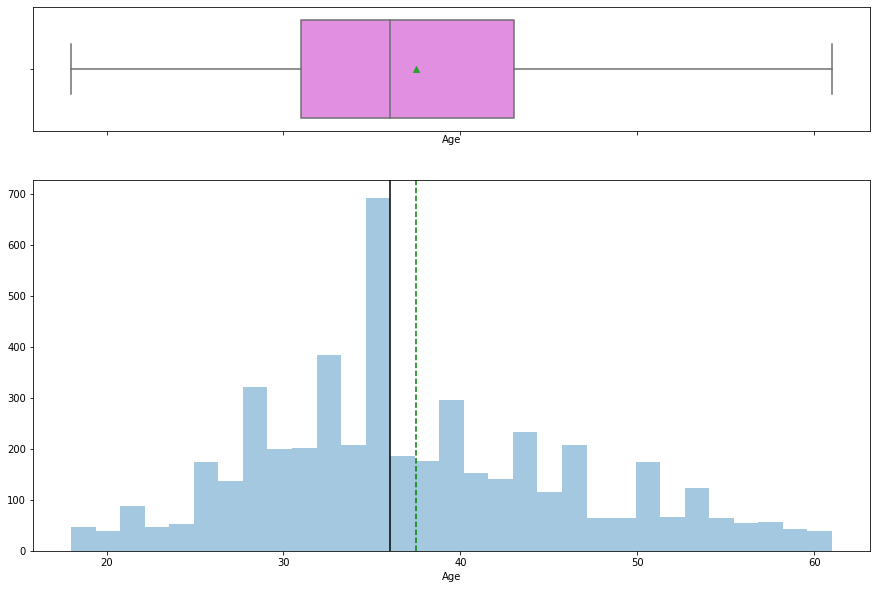

In [ ]:
histogram_boxplot(df['Age'])
plt.savefig('Plt_Age.png')
plt.show()

*  Age is looking normally distributed, with a hint of right skew
*  The customer distribution has a mean age of 37 yrs  and a median of 36 yrs
*  75% of the customers are 43 yrs or less with the oldest at 61 years

### Observations on Duration of Pitch

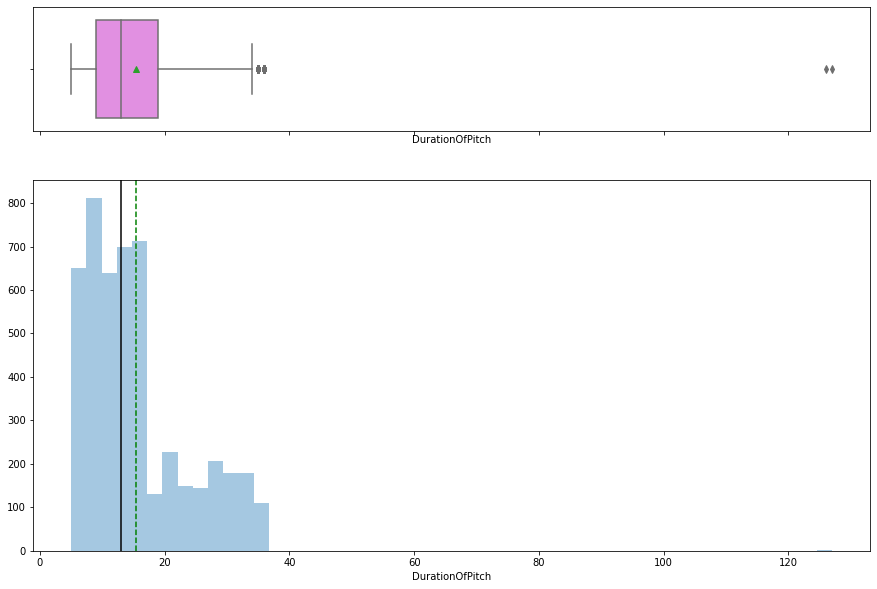

In [ ]:
histogram_boxplot(df['DurationOfPitch'])
plt.savefig('Plt_DoP.png')
plt.show()


*  The Duration of Speach shows a presence of Outliers
*  Some customers were pitched to for far longer periods than others
*  We will hope to see the impact of this on guaranteeing a the sale of any package
*  The mean duration was 15 while 75% of the customers were accorded 19 or less with maximum at 127

### Observations on Number of Person Visiting

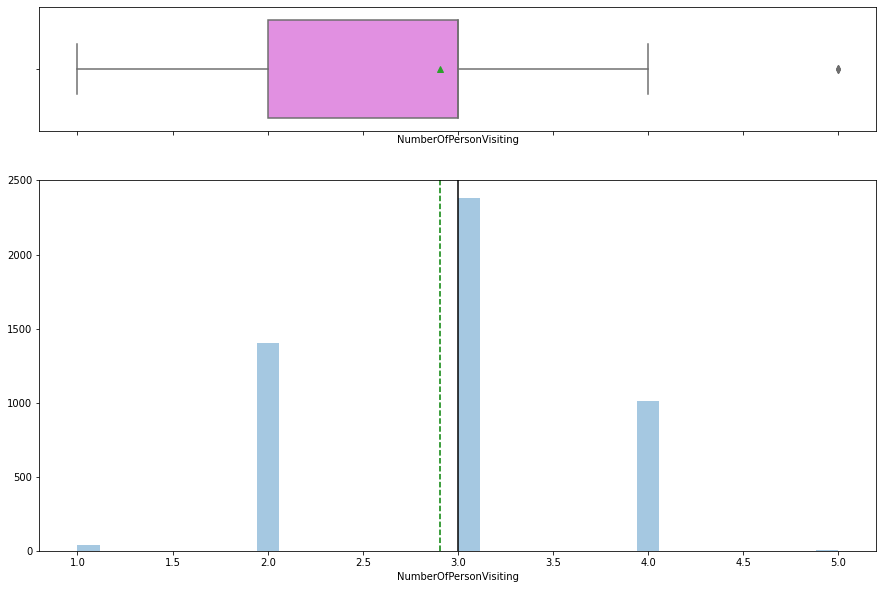

In [ ]:
histogram_boxplot(df['NumberOfPersonVisiting'])
plt.savefig('Plt_NPv.png')
plt.show()

*  This distribution has 3 peaksat 2,3 and 4.
*  This clearly indicates that majority of the customers have between 2 to 4 people willing to go on a trip with them

### Observations on Number of Followups

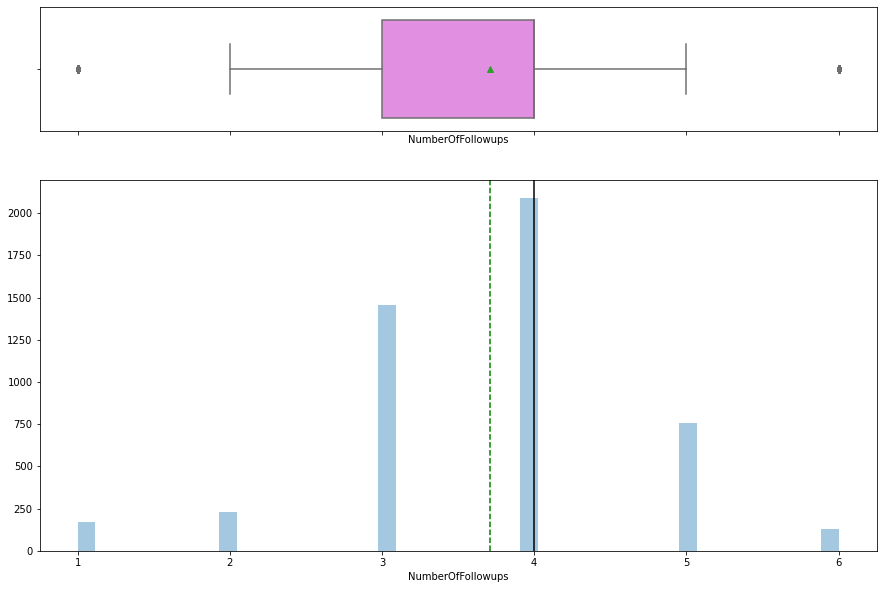

In [ ]:
histogram_boxplot(df['NumberOfFollowups'])
plt.savefig('Plt_NoF.png')
plt.show()

*  The Mean number of followup is greater than the median
*  The distribution for Number of followups has 3 peaks at 3, 4 and 5 with approximately 1400, 2000 and 750 customers respectively
*  There is a presence of outliers

### Observations on Number of Trips

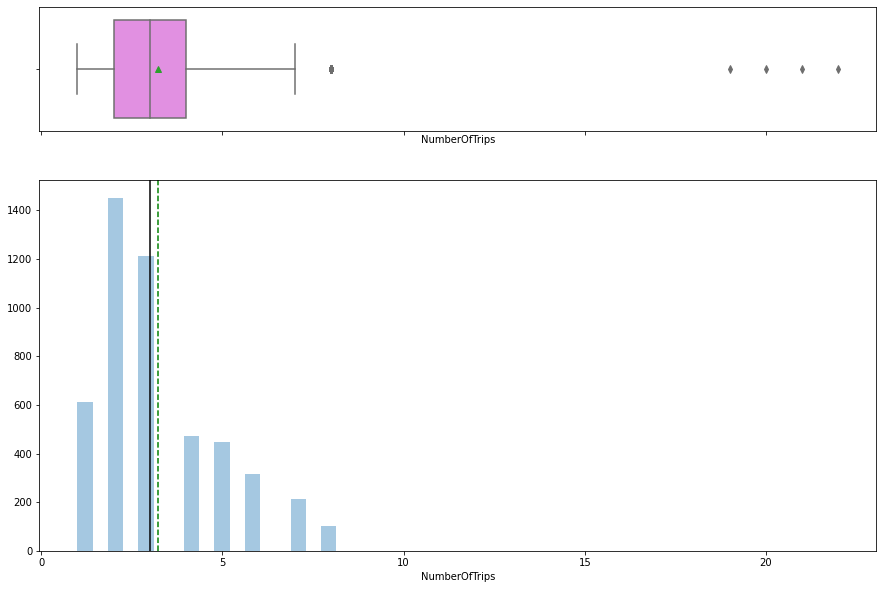

In [ ]:
histogram_boxplot(df['NumberOfTrips'])
plt.savefig('Plt_NoT.png')
plt.show()

*  Number of Trips distribution is right-skewed with Mean > Median and 75% of the customers making a trip of 4 or less
*  There are presence of outliers which irrefutably speaks to some customers taking far more trips than the lot

### Observations on Pitch Satisfaction Score

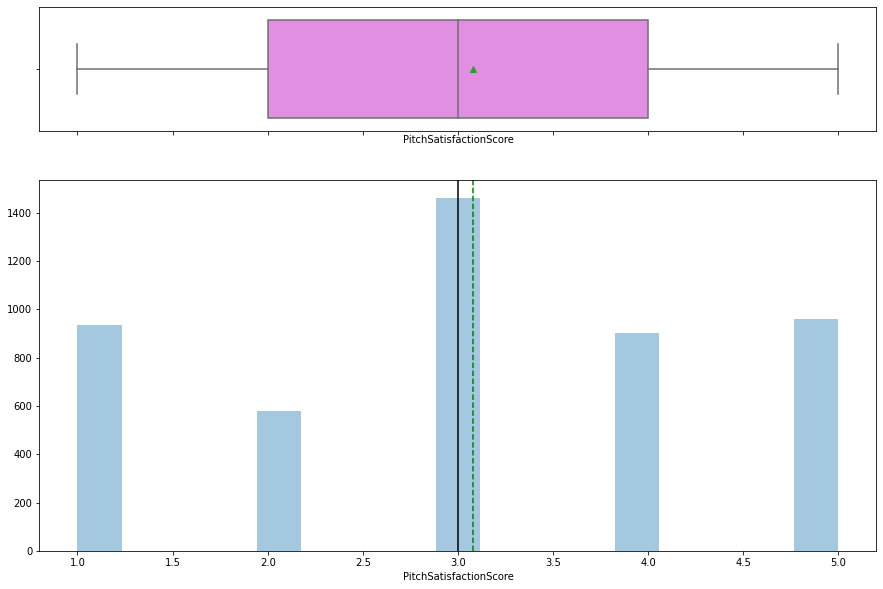

In [ ]:
histogram_boxplot(df['PitchSatisfactionScore'])
plt.savefig('Plt_PSS.png')
plt.show()

*  We can infer that the average Pitch score accross the distribution is 3. The other two peaks are at 1 and 5
*  This clearly portends a major influence on the target variable.
*  It is also evident why a lot of resources have been expended on insignificant customer brackets hence spiking the cost of doing business

### Observations on Number of Children Visiting

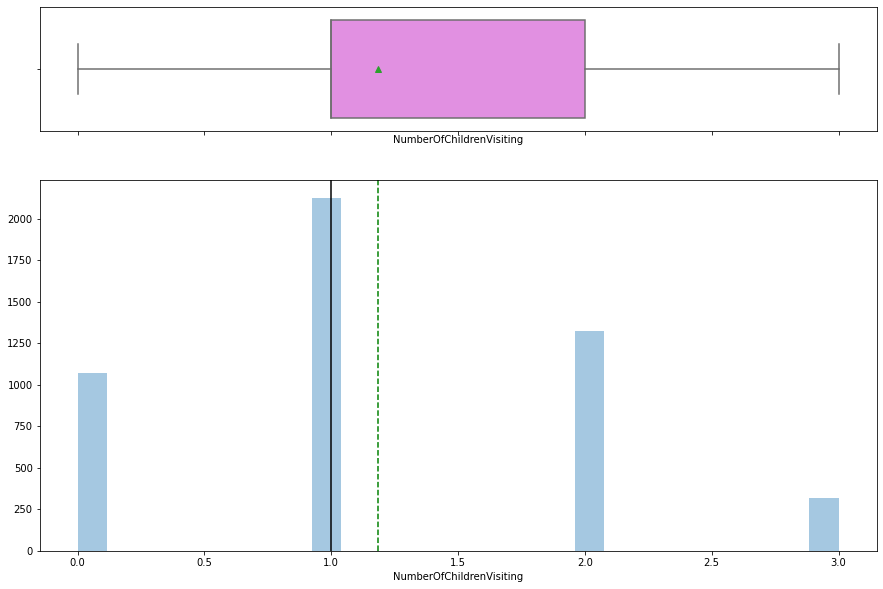

In [ ]:
histogram_boxplot(df['NumberOfChildrenVisiting'])
plt.savefig('Plt_NCv.png')
plt.show()

* The distribution peaks at 0, 1 and 2 respectively.
* No presencence of Outliers
* On average, 1 child is allowed to go on a visit with a customer.
* 75% of the distribution have 2 children or less who plan to go on a trip with customers


### Observations on Monthly Income

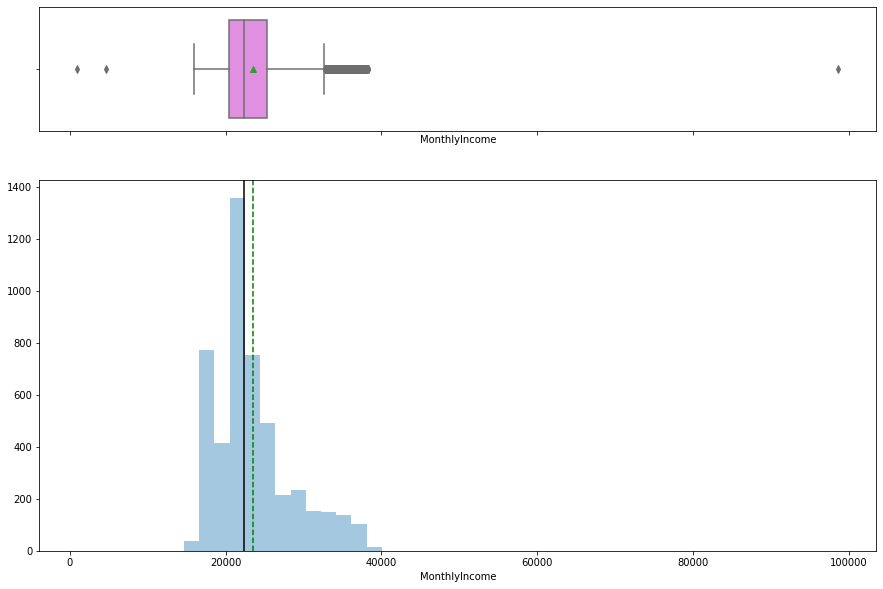

In [ ]:
histogram_boxplot(df['MonthlyIncome'])
plt.savefig('Plt_MI.png')
plt.show()

*  Monthly Income is a normal ditribution but is Right skewed.
*  Tremendous presence of outliers.This will be treated as we proceed.
*  We shall check later if Monthly Income is a core determinant in formulating the policy required by Visit with Us
*  Mean Income is 23473 compared to median at 22347
*  75% of the customers earn a monthly income of 25374 or less

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

### Observations on ProdTaken

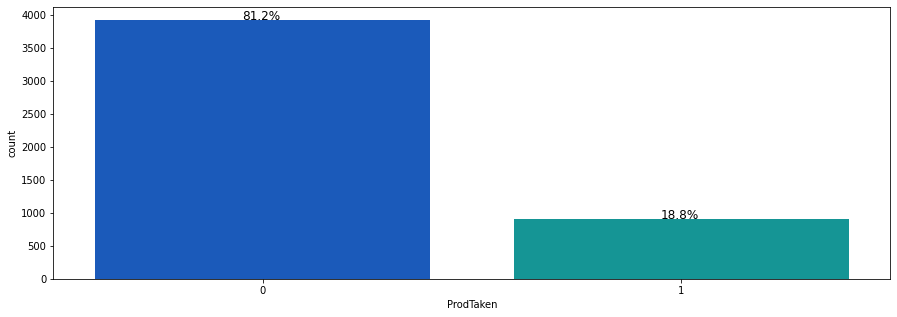

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["ProdTaken"],palette='winter')
perc_on_bar(ax,df["ProdTaken"])
plt.savefig('Plt_ProdTaken.png')
plt.show()

* 81.2% of the customers did not subscribe to any packages while just 18.8% did as earlier captured in the problem statement.

### Observations on Type of Contact

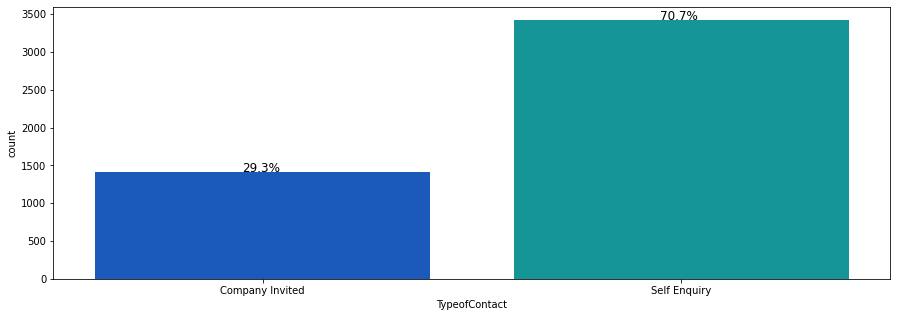

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["TypeofContact"],palette='winter')
perc_on_bar(ax,df["TypeofContact"])
plt.savefig('Plt_ToC.png')
plt.show()

* 70.7% of customers in data made Self Enquiries about the Products on offer while 29.3% were invited by the Company

### Observations on CityTier

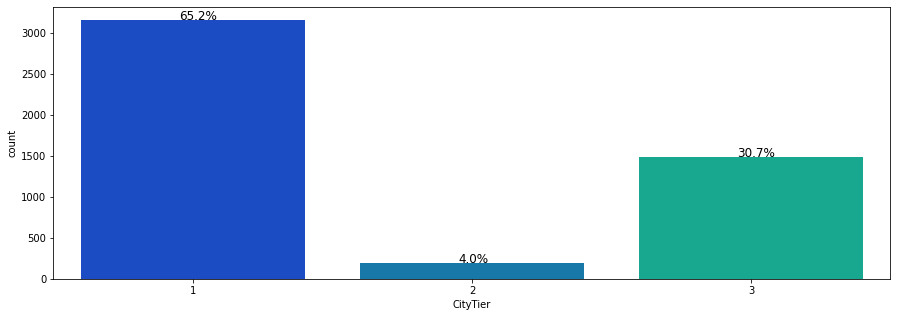

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["CityTier"],palette='winter')
perc_on_bar(ax,df["CityTier"])
plt.savefig('Plt_CityT.png')
plt.show()

* 65.2% of the customers are from Tier1 cities whith a high standard of living and more population and commercial activities as against the Tier2 City with a very distant 4.0% of the customers and finally Tier3 with the lowest standards of living and dense population coming in at 30.7%

### Observations on Occupation

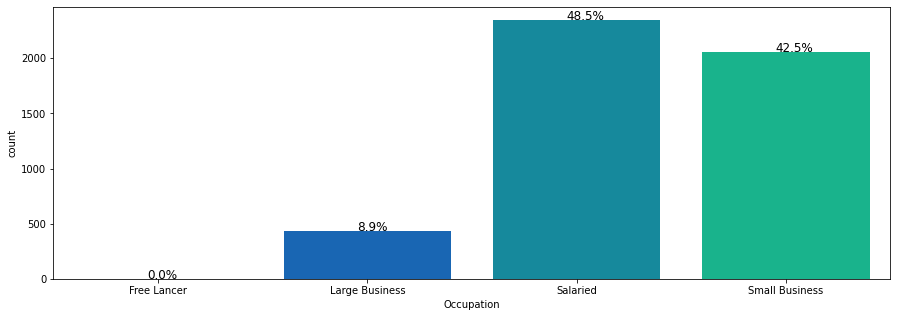

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Occupation"],palette='winter')
perc_on_bar(ax,df["Occupation"])
plt.savefig('Plt_Occ.png')
plt.show()

*  As can be inferred from the plot, 48.5% of the customers in the distribution are Salaried workers
*  This is followed closely by Small Business owners ith 42.5% and a distant 8.9% by Large Businesses.
*  Free Lancers are at the bottom with no presence.This is indeed an attraction as IT Professionals and other experts who earn quite a high income but are not salaried could be potential subscribers
*  This clearly speaks to allocating resources to seuring a more exhaustive data to track this bracket


### Observations on Gender

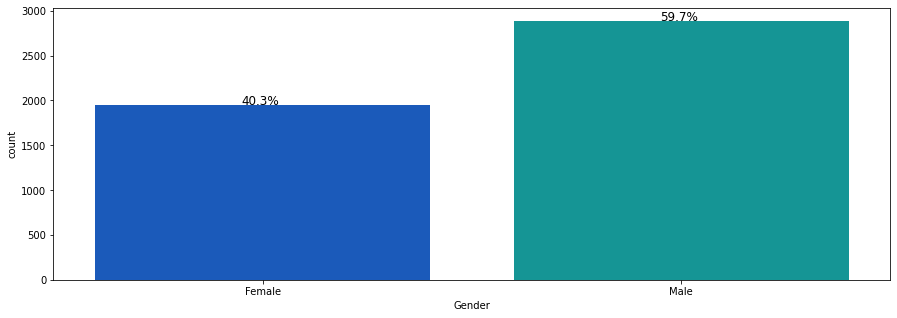

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Gender"],palette='winter')
perc_on_bar(ax,df["Gender"])
plt.savefig('Plt_G.png')
plt.show()

*  59.7% of the customers are Male
*  40.3% are Females. This group equally holds potentials as well.

### Observations on ProductPitched

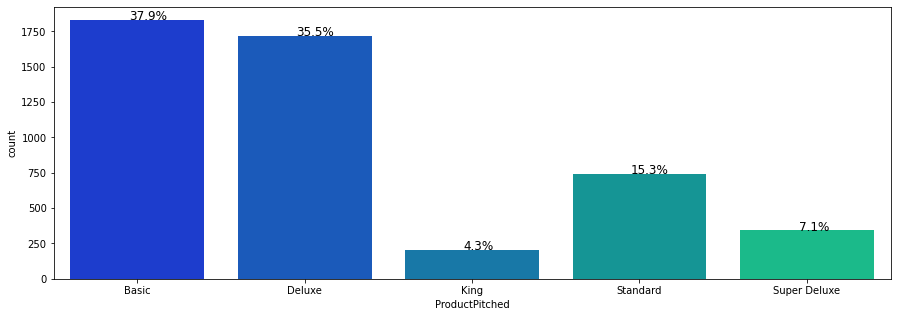

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["ProductPitched"],palette='winter')
perc_on_bar(ax,df["ProductPitched"])
plt.savefig('Plt_PrdP.png')
plt.show()

*  The Basic package was the most subscribed at 37.9% (1831 customers) followed closely by Deluxe at 35.5%
*  Standard,Super Deluxe and King respectively attracted low patronage at 15.3%, 7.1% and 4.3% accordingly
*  This is a clear indication of a lapse in target and constructive marketing. We shall expand on this during recommendations

### Observations on PreferredPropertyStar

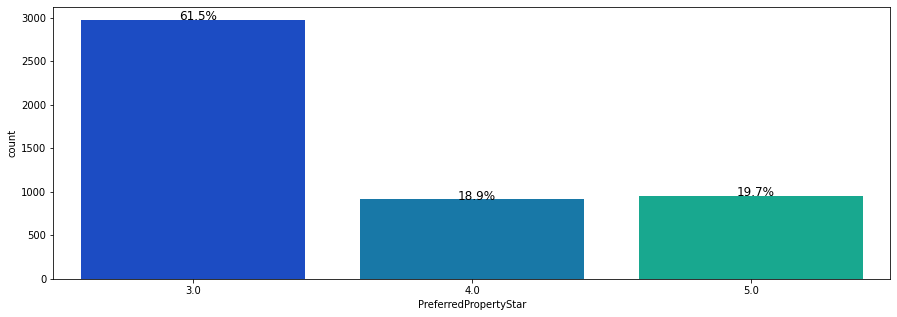

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["PreferredPropertyStar"],palette='winter')
perc_on_bar(ax,df["PreferredPropertyStar"])
plt.savefig('Plt_PPS.png')
plt.show()

* 61.5% of the customers prefer 3 star property types when they make a trip
* 19.7% of the customers of Vist with Us are attracted most to 5 star properties
* 18.9% incline more to 4 star properties

### Observations on MaritalStatus

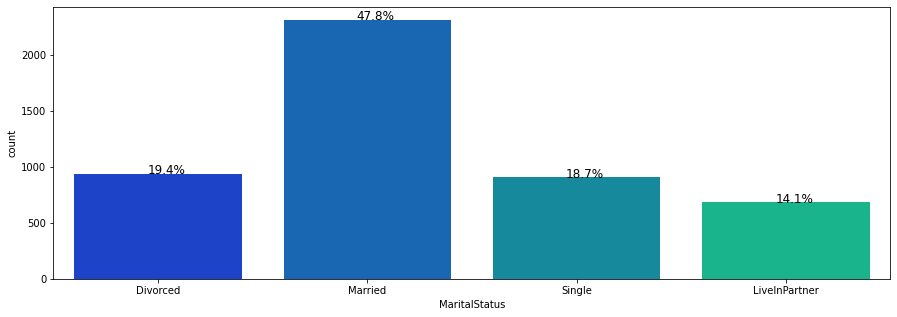

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["MaritalStatus"],palette='winter')
perc_on_bar(ax,df["MaritalStatus"])
plt.savefig('Plt_MS.png')
plt.show()

* Customers who are married top the chart of the Visit with Us database with 47.8% (2311)
* Divorced customers come second with 19.4% and Singles following closely at 18.7%
* LiveInPartners come last with 14.1% of the customers having this status

### Observations on Passport

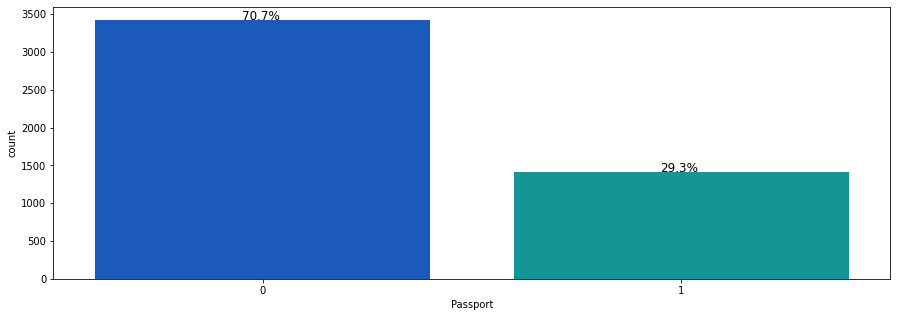

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Passport"],palette='winter')
perc_on_bar(ax,df["Passport"])
plt.savefig('Plt_PsPt.png')
plt.show()

* 70.7% of the customers own a Passport while 29.3% don't

### Observations on OwnCar

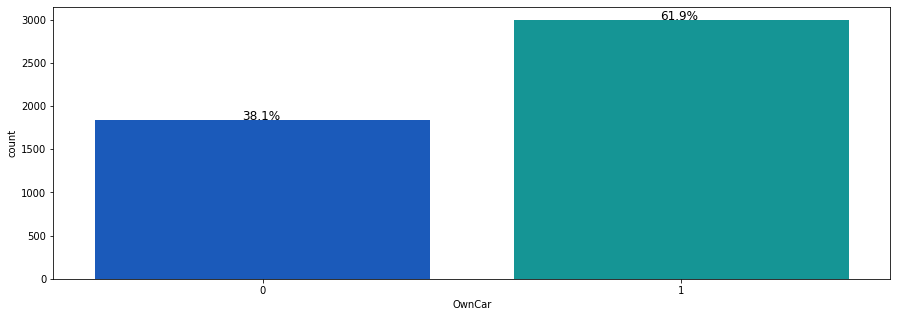

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["OwnCar"],palette='winter')
perc_on_bar(ax,df["OwnCar"])
plt.savefig('Plt_OwnC.png')
plt.show()

* 61.9% of the customers at Vist with Us own a car
* 38.1% of the customers do not own one
* It is indeed quite clear that more resources should be allocated pitching to customers with cars 
* Also, resources could be employed to monetze convenience for non-car owners.This will be epanded upon later

### Observations on Designation

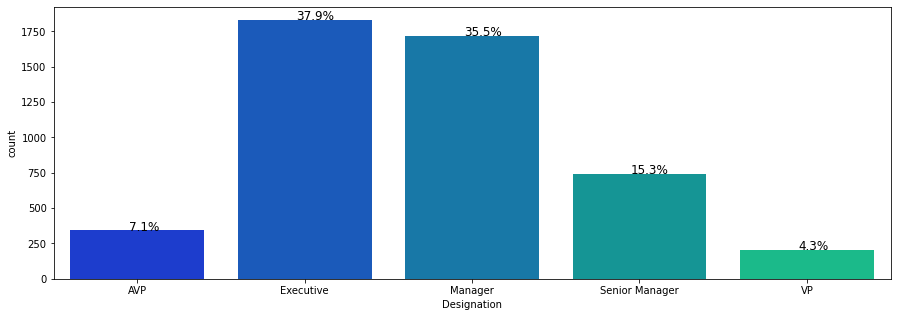

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Designation"],palette='winter')
perc_on_bar(ax,df["Designation"])
plt.savefig('Plt_Des.png')
plt.show()

* Executives lead the pack with 37.9% of the customer base followd closely by Managers at 35.5%
* Senior Managers come in at a distant 15.3%. Nearly half the size of the Managers
* Executive Management (AVP and VP) close in at 7.1% and 4.3% respectively

## Bivariate Analysis

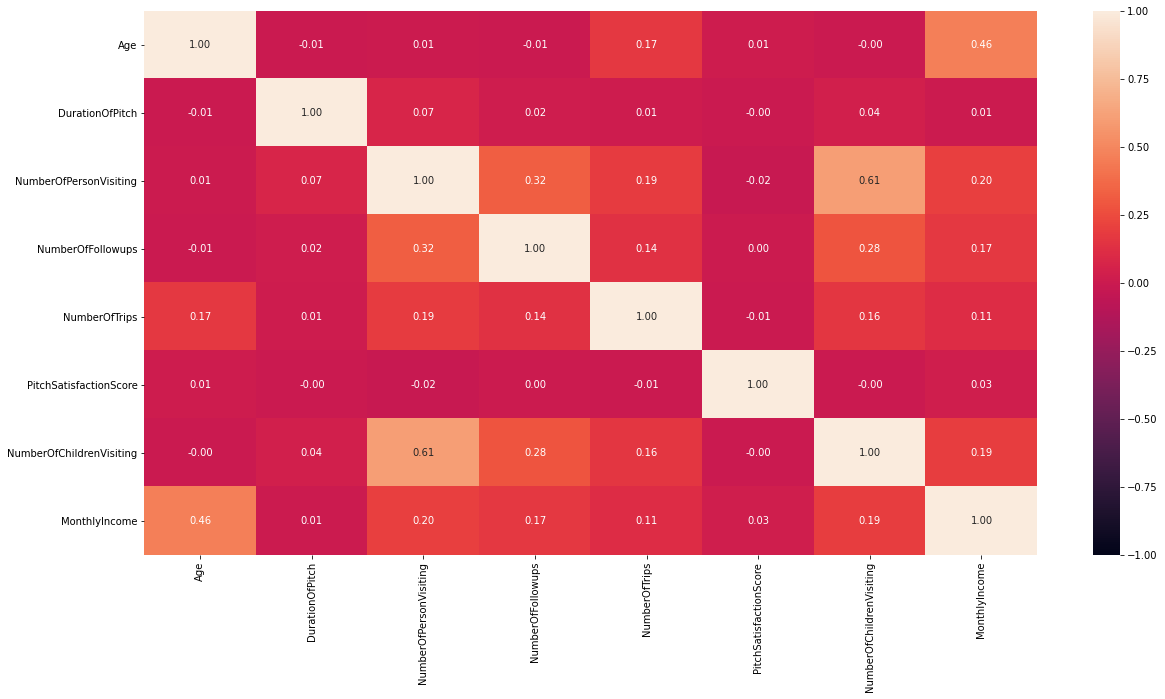

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.savefig('Plt_Hm.png')
plt.show()

* There is little or no correlation between most of the variables
* We can see a strong correlation between Number of Children visiting and Number of Persons visiting.This is clearly expected as the Number of Persons visiting includes the sum of the Number of children visiting.So we will be dropping the latter column prior to modelling
* We see a fairly reasonable correlation between Age and Income


### ProdTaken vs Customer Interaction Data

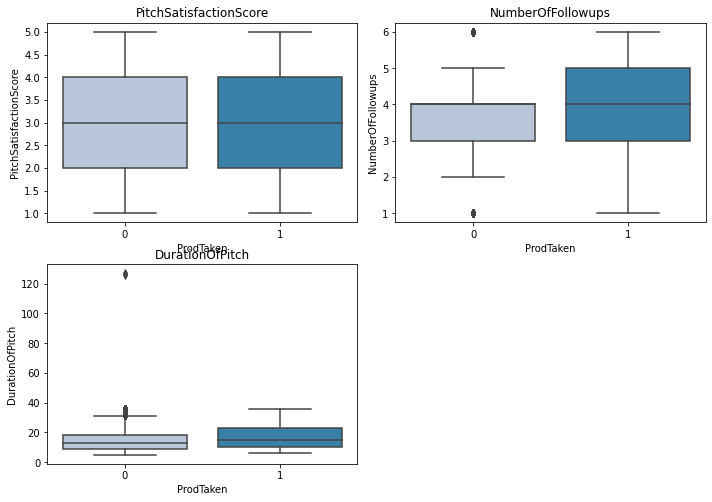

In [ ]:
cols = df[['PitchSatisfactionScore','NumberOfFollowups','DurationOfPitch']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["ProdTaken"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)

plt.savefig('Plt_PT_vs_CID.png')
plt.show()

### Observations

* The Pitch Satisfaction score clearly has no impact on the Subscription of Packages as both Customers who did or did not secure any package had relatively same scores
* Customers who subscribed to packages had a higher number of follow ups compared to others who didn't
* The Duration of Pitch clearly has an impact on subscription as customers who had higher durations subscribed

### ProdTaken vs Trip Data

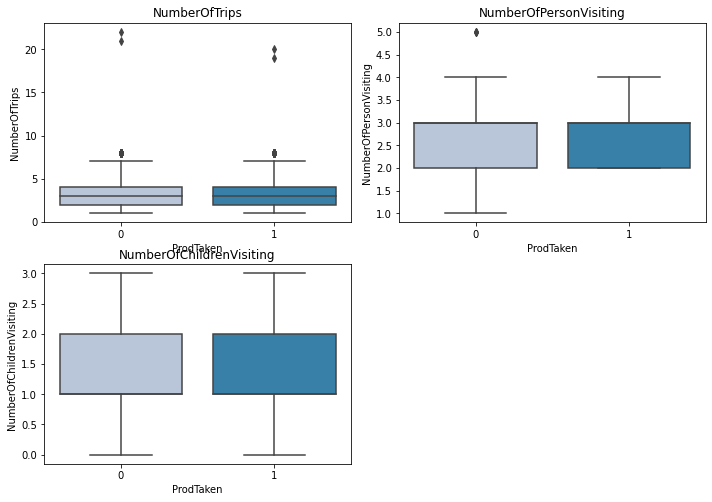

In [ ]:
cols = df[['NumberOfTrips', 'NumberOfPersonVisiting',
       'NumberOfChildrenVisiting']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["ProdTaken"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)

plt.savefig('Plt_TripD.png')
plt.show()

### Observations

* The Number of Trips also appears to be an irrelevant feature as both customers who did or did not buy to package did not show any marked difference 

* There is a clear correlation between Number of Children visiting and the Number of Persons Visiting .We would drop the former prior to modelling


### ProdTaken vs Age vs Monthly Income

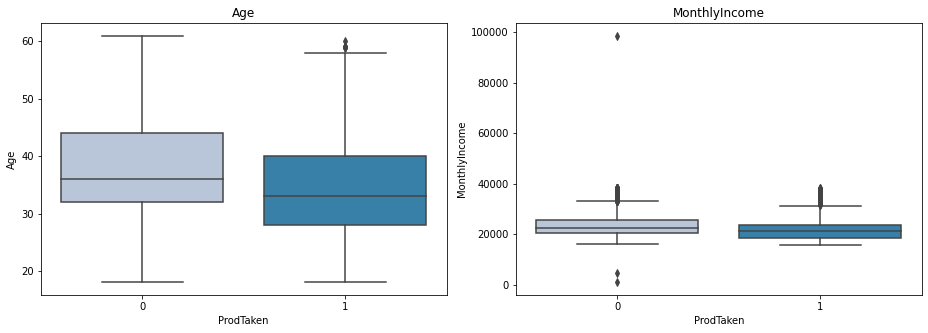

In [ ]:
cols = df[['Age','MonthlyIncome']].columns.tolist()
plt.figure(figsize=(13,13))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["ProdTaken"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)

plt.savefig('Plt_Age_MI.png')
plt.show()

### Observations

** Age
* Customers who did not take nor subscribe to any package are quite older than customers who did with the oldest at 60years
* Clearly, younger customers appeal more to Visit with Us but it is also evident that a significant chunk of those who did not buy equally have much younger prospects that the marketing team can track and trap 
* 75% of those whos subscribed are below the age of 40 years as against 45 years for those who didn't

** Monthly Income
* Customers who did not subscribe to any package earn higher income than those who did.
* This relationship also speaks to an obvious impact on the Product taken (Packages)


In [ ]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1106  309  1415
Self Enquiry     2820  602  3422
All              3926  911  4837
------------------------------------------------------------------------------------------------------------------------


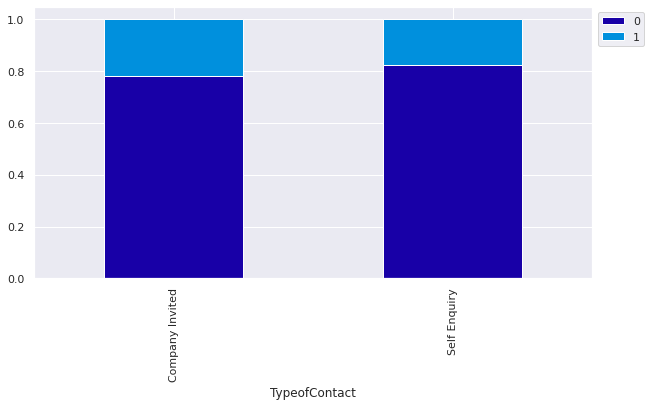

<Figure size 432x288 with 0 Axes>

In [ ]:
stacked_plot(df['TypeofContact'])
plt.savefig('SPlt_ToC.png')
plt.show()

* Customers invited by Visit with Us had higher subscriptions, roughly 21% compared to their counterparts even though there are more customers who Self Enquired compared to company invitations
* Scarce reources can be minimised with taking advantage of Technology for faster engagements through Mails, Social Media and Instant messages

ProdTaken     0    1   All
CityTier                  
1          2640  515  3155
2           149   46   195
3          1137  350  1487
All        3926  911  4837
------------------------------------------------------------------------------------------------------------------------


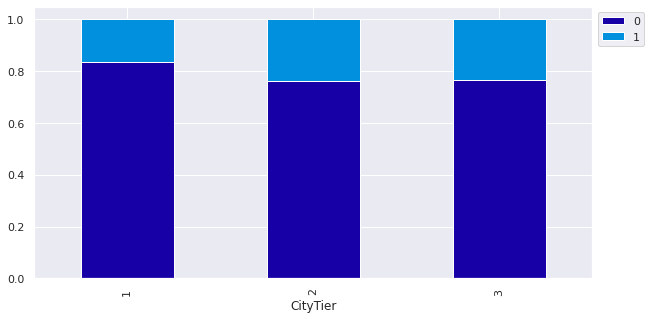

<Figure size 432x288 with 0 Axes>

In [ ]:
stacked_plot(df['CityTier'])
plt.savefig('SPlt_CityTier.png')
plt.show()

* Even though majority of the customers reside in Tier 1, customers from Tier 3 subscribed to more packages than thier counterparts in other locations with about 22%
* This validates the position that people from less sophisticated or developed locations would prefer a vacation in more devloped Tiers.

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   312  120   432
Salaried        1936  411  2347
Small Business  1678  378  2056
All             3926  911  4837
------------------------------------------------------------------------------------------------------------------------


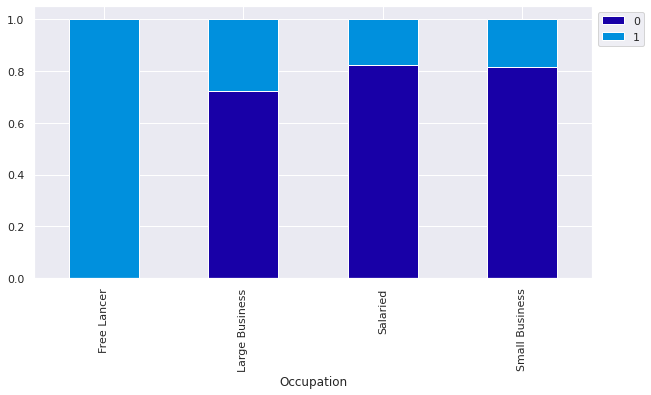

<Figure size 432x288 with 0 Axes>

In [ ]:
stacked_plot(df['Occupation'])
plt.savefig('SPlt_Occ.png')
plt.show()

* Free Lancers have a 100% subscription. This is followed by Large Businesses with roughly 28% 
* Small Businesses have the least subscriptions accross the distribution
* This speaks to common logic that growing small scale businesses would simply plough back funding to grow the business in addition to the scarce resources available rather than commit to what they might term frivolities

ProdTaken     0    1   All
Gender                    
Female     1611  339  1950
Male       2315  572  2887
All        3926  911  4837
------------------------------------------------------------------------------------------------------------------------


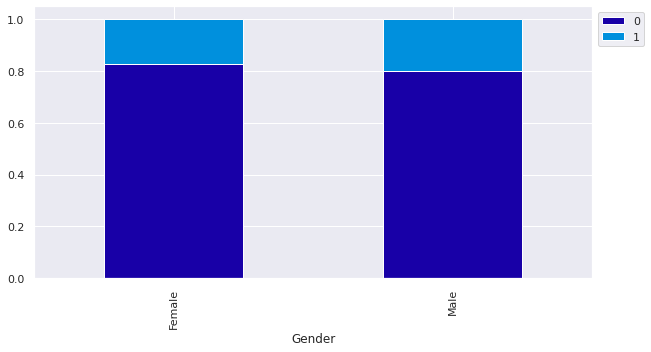

<Figure size 432x288 with 0 Axes>

In [ ]:
stacked_plot(df['Gender'])
plt.savefig('SPlt_Gender.png')
plt.show()

* Males have a higher subscription rate compared to females

ProdTaken          0    1   All
ProductPitched                 
Basic           1282  549  1831
Deluxe          1513  203  1716
King             191   16   207
Standard         618  123   741
Super Deluxe     322   20   342
All             3926  911  4837
------------------------------------------------------------------------------------------------------------------------


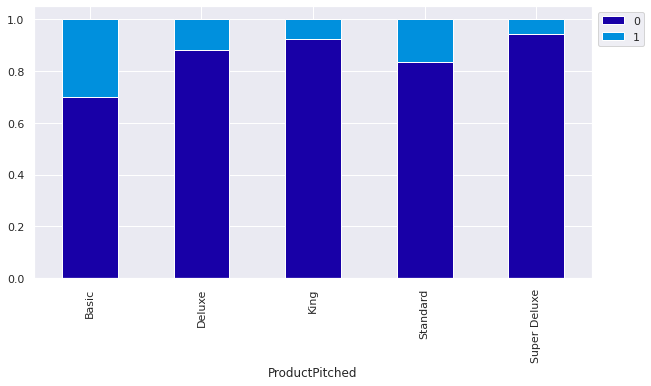

<Figure size 432x288 with 0 Axes>

In [ ]:
stacked_plot(df['ProductPitched'])
plt.savefig('SPlt_PrdP.png')
plt.show()

* Basic Package has the highest subscription rate at about 30% followed closely by Standard at roughly 16%
* Super Deluxe has the least subscription closely followed by King
* This speaks to the fact that customers would prefer a budget package in order to maximise their vacation spending on pthe priorities 

ProdTaken         0    1   All
MaritalStatus                 
Divorced        817  121   938
Married        1987  324  2311
Single          606  300   906
LiveInPartner   516  166   682
All            3926  911  4837
------------------------------------------------------------------------------------------------------------------------


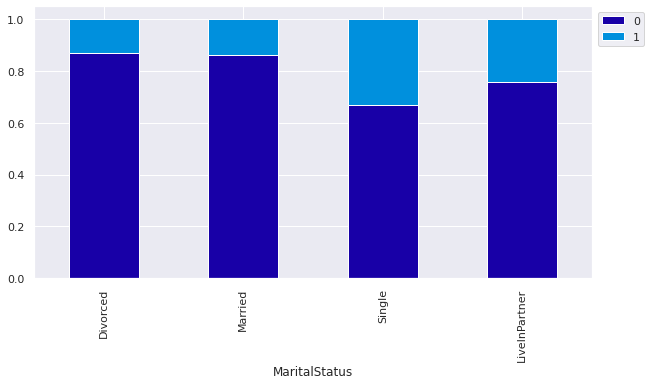

<Figure size 432x288 with 0 Axes>

In [ ]:
stacked_plot(df['MaritalStatus'])
plt.savefig('SPlt_MaritalS.png')
plt.show()

* As seen earlier, just as Visit with Us focuses more on the younger age bracket , it also tends to favor a lot more Singles with a 31% subscription. This is closely followed by LiveIn Partners at about 24%
* It is more than evident that Age nd Marital status clearly impact on the potential to be offered a subscription

ProdTaken     0    1   All
Passport                  
0          3002  420  3422
1           924  491  1415
All        3926  911  4837
------------------------------------------------------------------------------------------------------------------------


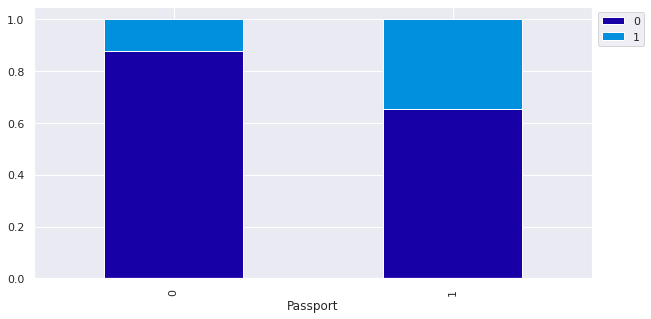

<Figure size 432x288 with 0 Axes>

In [ ]:
stacked_plot(df['Passport'])
plt.savefig('SPlt_Ppt.png')
plt.show()

* Those with Passports have an estimated 35% subscription as against those without with approx. 12%
* This makes sense as  major determinant for eligibilty to subscribe to a package

ProdTaken     0    1   All
OwnCar                    
0          1484  358  1842
1          2442  553  2995
All        3926  911  4837
------------------------------------------------------------------------------------------------------------------------


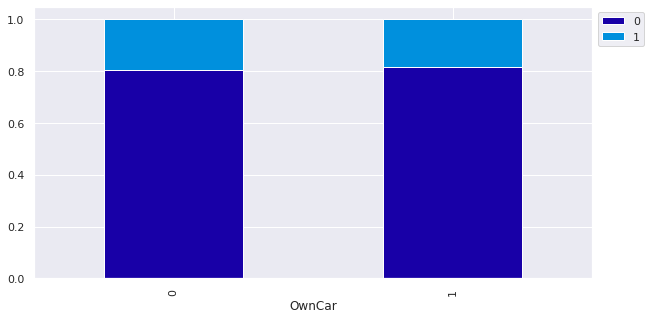

<Figure size 432x288 with 0 Axes>

In [ ]:
stacked_plot(df['OwnCar'])
plt.savefig('SPlt_OwnC.png')
plt.show()

* There is relatively a near insignificant relationship between Products taken and Owncar as it concerns  those who did or did not subscribe to any of the packages
* This is not a good predictor of who or who won't bu a package


ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1282  549  1831
Manager         1513  203  1716
Senior Manager   618  123   741
VP               191   16   207
All             3926  911  4837
------------------------------------------------------------------------------------------------------------------------


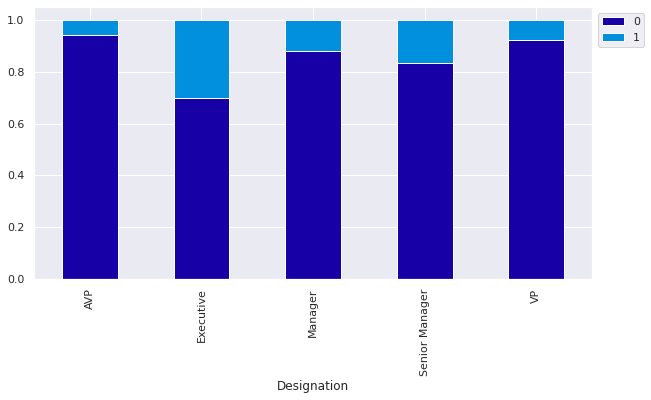

<Figure size 432x288 with 0 Axes>

In [ ]:
stacked_plot(df['Designation'])
plt.savefig('SPlt_Des.png')
plt.show()

* Employees who work overtime tend to attrite more.
* There a ~35% probability of attrition among employees working overtime.

### Assumptions Prior To Model Building

*  Outlier Treatment is not handled because basically all Modeling Techniques being employed in Esemble Classification case definitions are Decision Tree Based
*  Decision Trees are very robust to Outliers and as such compensate for any shortcomings occassioned by their presence

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

### Data Preparation


In [ ]:
# Let us now return all independent variables to numerical values for a cleaner modelling process as we are done with our EDA

df.PreferredPropertyStar = df.PreferredPropertyStar.astype('float64')
df.CityTier = df.CityTier.astype('int64')
df.Passport = df.Passport.astype('int64')
df.OwnCar = df.OwnCar.astype('int64')

oneHotCols=["Gender","MaritalStatus","Designation","TypeofContact","Occupation","ProductPitched"]

In [ ]:

df.dtypes

ProdTaken                   category
Age                          float64
TypeofContact               category
CityTier                       int64
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar        float64
MaritalStatus               category
NumberOfTrips                float64
Passport                       int64
PitchSatisfactionScore         int64
OwnCar                         int64
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

In [ ]:
# Note that the NumberofPersonVisiting and the NumberofChildrenVisiting are highly correlated, hence the need to drop the latter
X = df.drop(['ProdTaken','NumberOfChildrenVisiting'],axis=1)
X = pd.get_dummies(X, columns=oneHotCols)
y = df['ProdTaken'].astype('int64')

## Split Data

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
* This is done using the `stratify` parameter in the train_test_split function.

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3385, 33) (1452, 33)


In [ ]:
y.value_counts(1) 
#y.value_counts(normalize=True) #If True then the object returned will contain the relative frequencies of the unique values.

0    0.81166
1    0.18834
Name: ProdTaken, dtype: float64

In [ ]:
y_test.value_counts(1)

0    0.811983
1    0.188017
Name: ProdTaken, dtype: float64

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will subscribe to a package and customer doesn't 
2. Predicting a customer will not subscribe to a package and the customer actually does

### Which case is more important? 
* Predicting that a customer will not subscribe but he actually does i.e. losing on a valuable customer that would have added value to Visit with Us

### How to reduce this loss i.e need to reduce False Negatives?
* Visit with Us wants Recall to be maximized, the greater the Recall the higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can provide incentives to secure more subscriptions as well as trap and track potential brackets thereby optimizing the overall project cost in converting untapped prospects

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [ ]:
##  Function to calculate recall score
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [ ]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.19,1:0.81} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [ ]:
dtr = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)

In [ ]:
dtr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.19, 1: 0.81},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

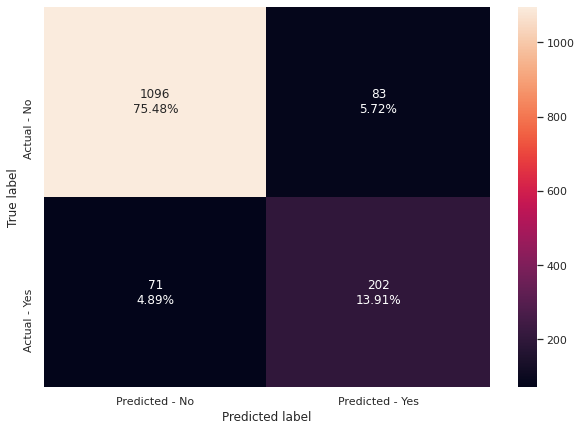

In [ ]:
make_confusion_matrix(dtr,y_test)

**Confusion Matrix -**

* Customer subscribed and the model predicted it correctly that customer subscribed :  True Positive (observed=1,predicted=1)

* Customer did not subscribe and the model predicted customer subscribed : False Positive (observed=0,predicted=1)

* Customer did not subscribe and the model predicted customer will not subscribe : True Negative (observed=0,predicted=0)

* Customer did subscribe and the model predicted that customer won't : False Negative (observed=1,predicted=0)

In [ ]:
dtr_acc = get_accuracy_score(dtr)
dtr_recall = get_recall_score(dtr)
dtr_precision = get_precision_score(dtr)

Accuracy on training set :  1.0
Accuracy on test set :  0.8939393939393939
Recall on training set :  1.0
Recall on test set :  0.73992673992674
Precision on training set :  1.0
Precision on test set :  0.7087719298245614


* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.

### Bagging Classifier

In [ ]:
bagged = BaggingClassifier(random_state=1)
bagged.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

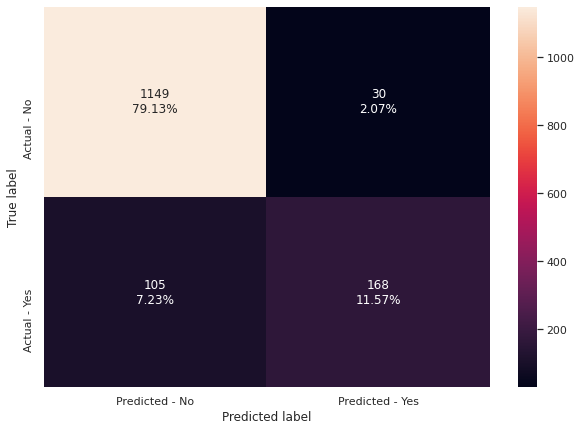

In [ ]:
make_confusion_matrix(bagged,y_test)

In [ ]:
bagged_acc = get_accuracy_score(bagged)
bagged_recall = get_recall_score(bagged)
bagged_precision = get_precision_score(bagged)

Accuracy on training set :  0.9929098966026588
Accuracy on test set :  0.9070247933884298
Recall on training set :  0.9639498432601881
Recall on test set :  0.6153846153846154
Precision on training set :  0.9983766233766234
Precision on test set :  0.8484848484848485


* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall.

### Bagging Classifier with weighted decision tree

In [ ]:
bagged_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1),random_state=1)
bagged_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='depr

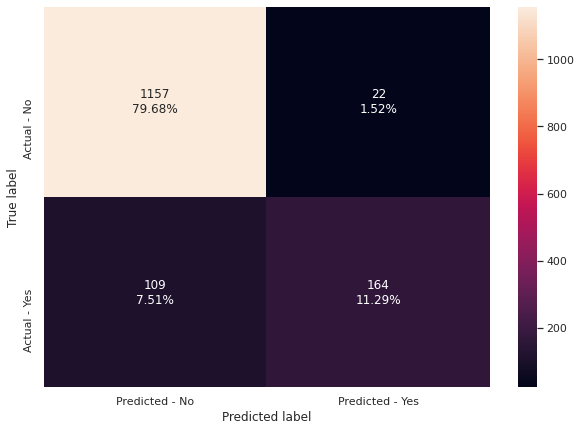

In [ ]:
make_confusion_matrix(bagged_wt,y_test)

In [ ]:
bagged_wt_acc = get_accuracy_score(bagged_wt)
bagged_wt_recall = get_recall_score(bagged_wt)
bagged_wt_precision = get_precision_score(bagged_wt)

Accuracy on training set :  0.9943870014771049
Accuracy on test set :  0.9097796143250688
Recall on training set :  0.9702194357366771
Recall on test set :  0.6007326007326007
Precision on training set :  1.0
Precision on test set :  0.8817204301075269


* Bagging classifier with a weighted decision tree is giving very good accuracy and precision but is not able to generalize well on test data in terms of recall.

### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

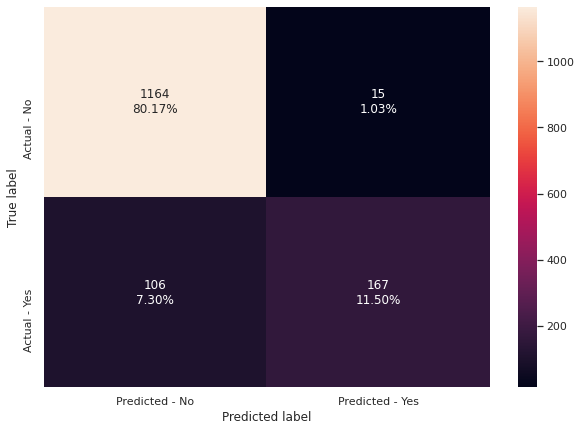

In [ ]:
make_confusion_matrix(rf,y_test)

In [ ]:
rf_acc = get_accuracy_score(rf)
rf_recall = get_recall_score(rf)
rf_precision = get_precision_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9166666666666666
Recall on training set :  1.0
Recall on test set :  0.6117216117216118
Precision on training set :  1.0
Precision on test set :  0.9175824175824175


* Random Forest is overfitting in terms of accuracy and precision, but it is not able to generalize well on the test data in terms of recall.

**Random forest with class weights**

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.19, 1: 0.81}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

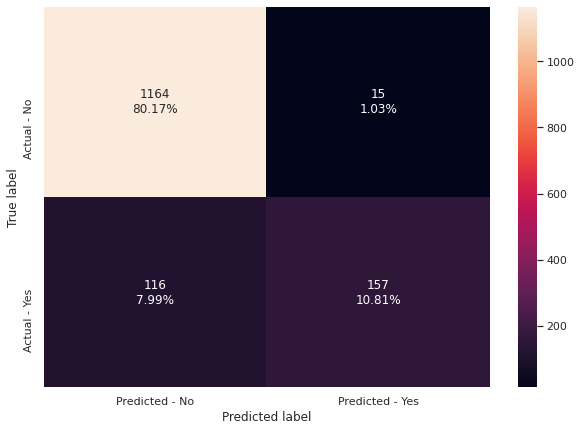

In [ ]:
make_confusion_matrix(rf_wt,y_test)

In [ ]:
rf_wt_acc = get_accuracy_score(rf_wt)
rf_wt_recall = get_recall_score(rf_wt)
rf_wt_precision = get_precision_score(rf_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.9097796143250688
Recall on training set :  1.0
Recall on test set :  0.575091575091575
Precision on training set :  1.0
Precision on test set :  0.9127906976744186


* The Model is Overfitting with quite a low Recall on Test.
* There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

### Tuning Models

### Using GridSearch for Hyperparameter tuning model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

### Tuning Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier. 
dtr_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,25), 
              'min_samples_leaf': [1, 3, 6, 8, 10],
              'max_leaf_nodes' : [2, 3, 5, 11,14],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtr_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtr_estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.19, 1: 0.81},
                       criterion='gini', max_depth=6, max_features=None,
                       max_leaf_nodes=14, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

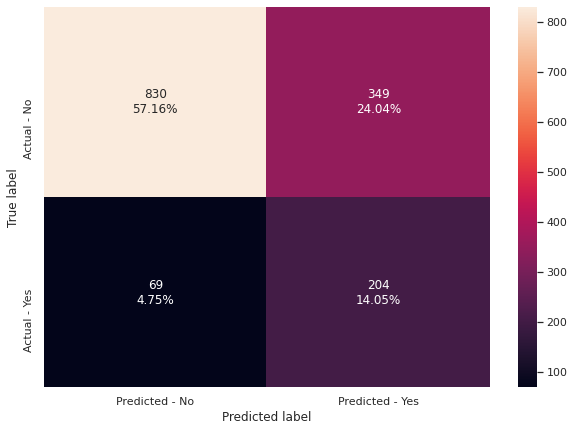

In [ ]:
make_confusion_matrix(dtr_estimator,y_test)

In [ ]:
tuned_dtr_acc = get_accuracy_score(dtr_estimator)
tuned_dtr_recall = get_recall_score(dtr_estimator)
tuned_dtr_precision = get_precision_score(dtr_estimator)

Accuracy on training set :  0.7465288035450517
Accuracy on test set :  0.7121212121212122
Recall on training set :  0.7648902821316614
Recall on test set :  0.7472527472527473
Precision on training set :  0.4080267558528428
Precision on test set :  0.3688969258589512


* Overfitting in decision tree has reduced and the Recall has increased but does not genralize well on Precision.

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtr_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Passport                       0.318509
ProductPitched_Basic           0.188540
CityTier                       0.105657
Age                            0.093373
DurationOfPitch                0.077789
MaritalStatus_Married          0.052562
PreferredPropertyStar          0.050141
NumberOfFollowups              0.041833
Occupation_Large Business      0.037428
PitchSatisfactionScore         0.034167
ProductPitched_King            0.000000
ProductPitched_Standard        0.000000
ProductPitched_Deluxe          0.000000
Designation_Senior Manager     0.000000
Occupation_Small Business      0.000000
Occupation_Salaried            0.000000
Occupation_Free Lancer         0.000000
TypeofContact_Self Enquiry     0.000000
TypeofContact_Company Invited  0.000000
Designation_VP                 0.000000
MaritalStatus_LiveInPartner    0.000000
Designation_Manager            0.000000
Designation_Executive          0.000000
Designation_AVP                0.000000


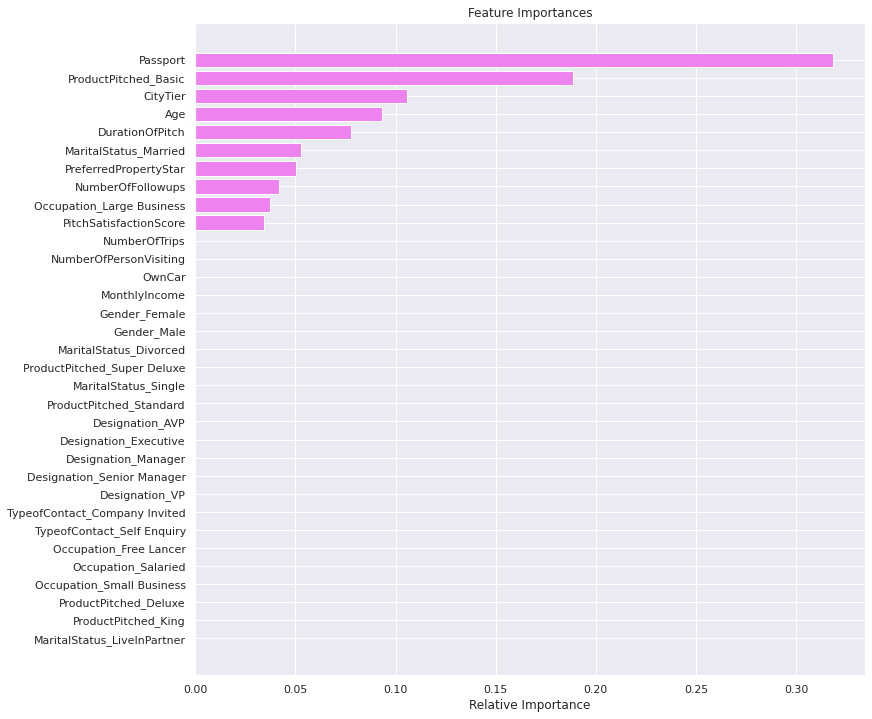

In [ ]:
# Plotting the Feature Importance for each Variable
feature_names = X_train.columns
importances = dtr_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Passport is the most important feature in the tuned decision tree followed by Basic Product_Pitched,CityTier, Age, DurationofPitch  and Married MaritalStatus

**Tuning Bagging Classifier**

In [ ]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101], #The number of trees in the forest.
              'max_features': [0.7,0.8,0.9,1] #The number of features to consider when looking for the best split
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), #
                    param_grid=param_grid, # Dictionary or list of parameters of models or function in which
                                            # GridSearchCV have to select the best.
                    scoring = 'recall', #Evaluating metric for the model performance to decide the best 
                                        # hyperparameters, if not especified then it uses estimator score.
                    cv = 5 # Signifies the number of splits that is needed for cross validation. But default is set as 5.
                   )
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=1,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weight...
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                  

In [ ]:
## getting the best estimator
bagged_estimator  = grid.best_estimator_
bagged_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='depr

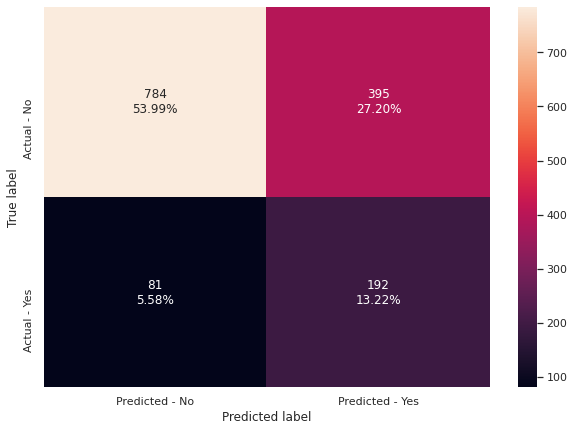

In [ ]:
make_confusion_matrix(bagged_estimator,y_test)

In [ ]:
tuned_bagged_acc= get_accuracy_score(bagged_estimator)
tuned_bagged_recall = get_recall_score(bagged_estimator)
tuned_bagged_precision = get_precision_score(bagged_estimator)

Accuracy on training set :  0.6853766617429837
Accuracy on test set :  0.6721763085399449
Recall on training set :  0.6551724137931034
Recall on test set :  0.7032967032967034
Precision on training set :  0.3309580364212193
Precision on test set :  0.3270868824531516


* Recall has improved but the accuracy and precision of the model has dropped drastically which is an indication that overall the model is making many mistakes.

**Tuning Random Forest**

In [ ]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [150,225,275],
        "min_samples_leaf": np.arange(5,10),
        "max_features": [0.5,0.8,'log2','auto'],#If “auto”, then max_features=sqrt(n_features).
                                                #If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
                                                #If “log2”, then max_features=log2(n_features).
                                                #If None, then max_features=n_features.
        "max_samples": [0.3,0.7,0.1],
}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.8,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=225,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

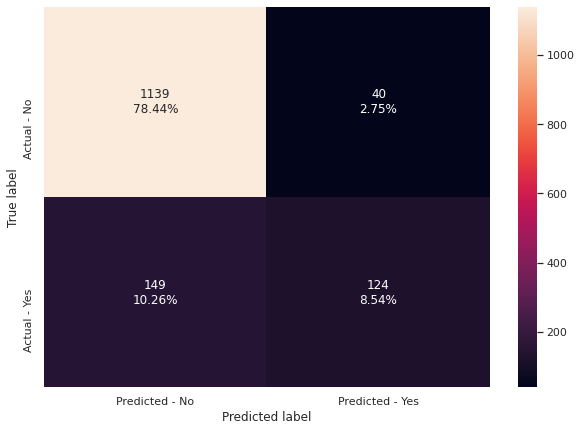

In [ ]:
make_confusion_matrix(rf_estimator,y_test)

In [ ]:
tuned_rf_acc = get_accuracy_score(rf_estimator)
tuned_rf_recall = get_recall_score(rf_estimator)
tuned_rf_precision = get_precision_score(rf_estimator)

Accuracy on training set :  0.9220088626292466
Accuracy on test set :  0.8698347107438017
Recall on training set :  0.6238244514106583
Recall on test set :  0.4542124542124542
Precision on training set :  0.943127962085308
Precision on test set :  0.7560975609756098


* Random forest after tuning is performing below par

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Age                            0.140239
Passport                       0.114067
DurationOfPitch                0.112091
MonthlyIncome                  0.107937
Designation_Executive          0.053290
NumberOfTrips                  0.050541
PitchSatisfactionScore         0.048332
NumberOfFollowups              0.043755
ProductPitched_Basic           0.043082
CityTier                       0.042718
PreferredPropertyStar          0.039683
MaritalStatus_Single           0.032392
MaritalStatus_Married          0.022597
MaritalStatus_LiveInPartner    0.017515
NumberOfPersonVisiting         0.017507
OwnCar                         0.013755
Occupation_Large Business      0.012436
Occupation_Small Business      0.011429
Occupation_Salaried            0.010784
Gender_Female                  0.010658
Gender_Male                    0.009896
MaritalStatus_Divorced         0.009551
TypeofContact_Self Enquiry     0.008839
TypeofContact_Company Invited  0.008744


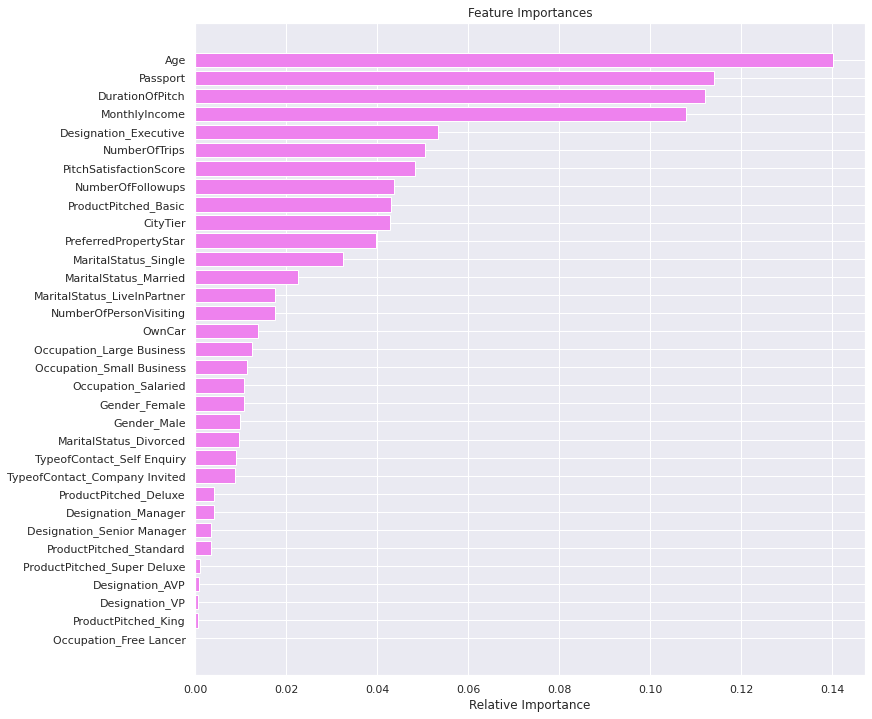

In [ ]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Age is the most important feature followed by Passport, Duration of Pitch and Monthly Income 

## Boosting
- We are going to build 3 ensemble models here - AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.

### AdaBoost Classifier

In [ ]:
ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
ada_acc = get_accuracy_score(ada)
ada_recall = get_recall_score(ada)
ada_precision = get_precision_score(ada)

Accuracy on training set :  0.851698670605613
Accuracy on test set :  0.831267217630854
Recall on training set :  0.3510971786833856
Recall on test set :  0.34065934065934067
Precision on training set :  0.717948717948718
Precision on test set :  0.5886075949367089


* There is overfitting on the Train set with a High Accuracy and Precision but the model falls short of generalizing well on the Recall testscore

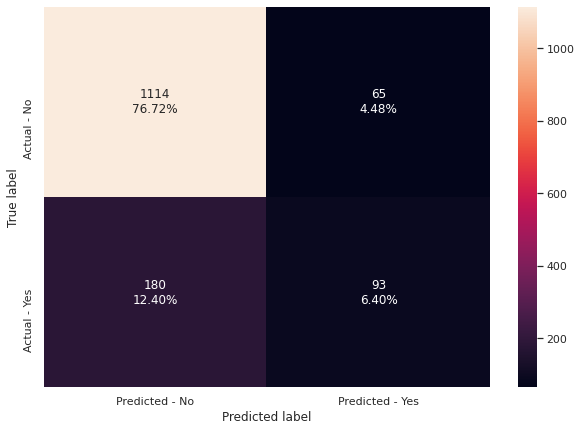

In [ ]:
make_confusion_matrix(ada,y_test)

### Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_acc = get_accuracy_score(gbc)
gbc_recall = get_recall_score(gbc)
gbc_precision = get_precision_score(gbc)

Accuracy on training set :  0.892466765140325
Accuracy on test set :  0.8663911845730028
Recall on training set :  0.5015673981191222
Recall on test set :  0.4542124542124542
Precision on training set :  0.8743169398907104
Precision on test set :  0.7337278106508875


* Similar non generalizing model like the AdaBoost Classifier with overfitting

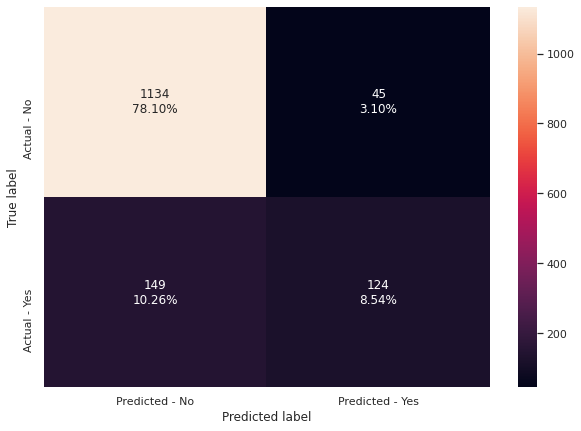

In [ ]:
make_confusion_matrix(gbc,y_test)

### XGBoost Classifier

In [ ]:
xgbc = XGBClassifier(random_state=1)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgbc_acc = get_accuracy_score(xgbc)
xgbc_recall = get_recall_score(xgbc)
xgbc_precision = get_precision_score(xgbc)

Accuracy on training set :  0.8841949778434269
Accuracy on test set :  0.8601928374655647
Recall on training set :  0.4592476489028213
Recall on test set :  0.41025641025641024
Precision on training set :  0.861764705882353
Precision on test set :  0.7272727272727273


*  Significant improvement on Test Recall with a reasonable generalizing characteristics

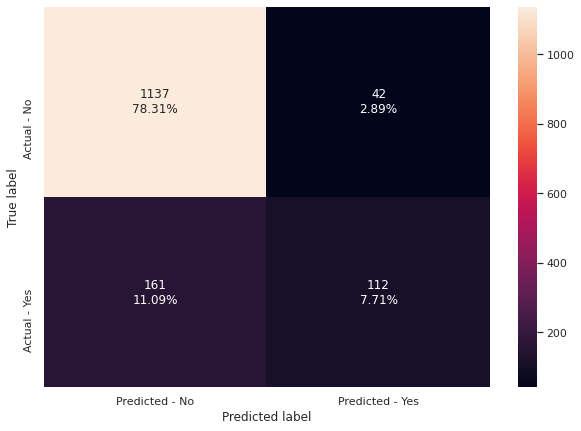

In [ ]:
make_confusion_matrix(xgbc,y_test)

**With default parameters:**
- XGBoost classifier has better test accuracy and precision among these 3 models.
- AdaBoost classifier has the least test accuracy and test recall.

## HyperParameter Tuning

### Adaboost Classifier

In [ ]:
# Choose the type of classifier. 
ada_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ada_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ada_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ada_tuned.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

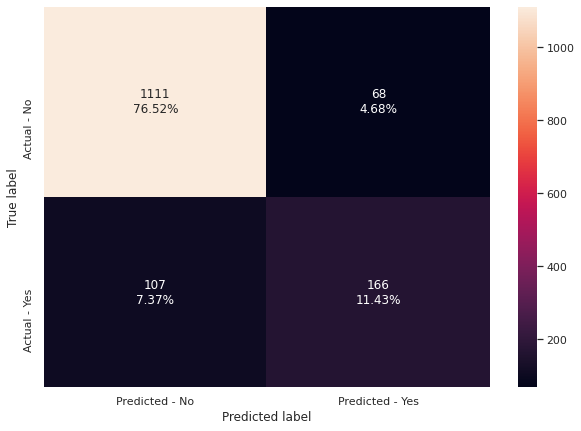

In [ ]:
make_confusion_matrix(ada_tuned, y_test)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
ada_tuned_acc = get_accuracy_score(ada_tuned)
ada_tuned_recall = get_recall_score(ada_tuned)
ada_tuned_precision = get_precision_score(ada_tuned)

Accuracy on training set :  0.9816838995568685
Accuracy on test set :  0.8794765840220385
Recall on training set :  0.9294670846394985
Recall on test set :  0.608058608058608
Precision on training set :  0.9721311475409836
Precision on test set :  0.7094017094017094


* The Model is not generalizing well. It is overfitting on the Train set,with Recall taking a dive

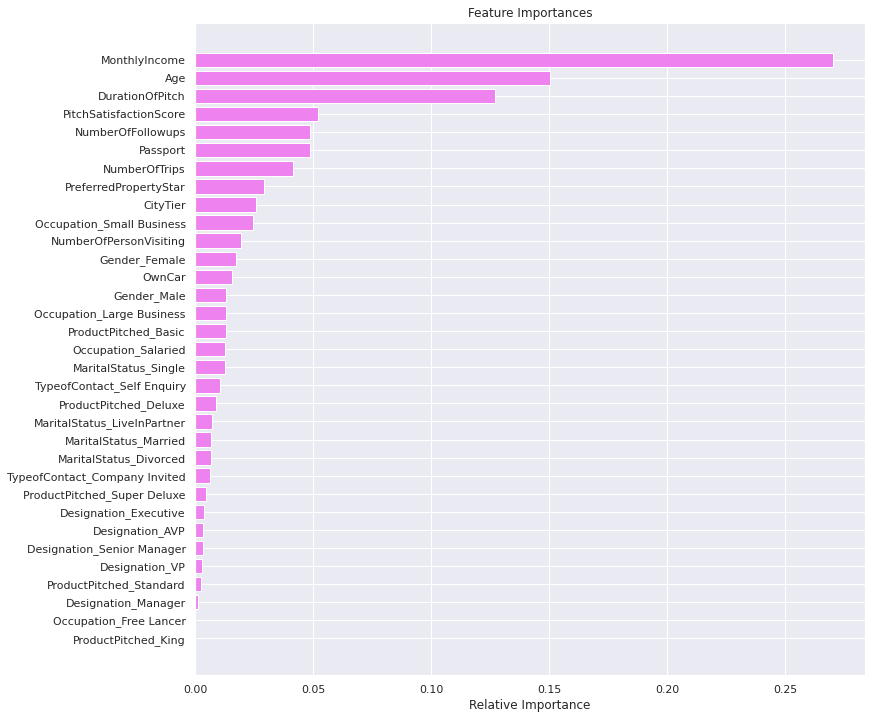

In [ ]:
importances = ada_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The most important feature is the Monthly Income in line with the Tuned Adaboost along with Age and Duration of Pitch 

### Gradient Boosting Classifier
**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [ ]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=1),
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
            

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_acc = get_accuracy_score(gbc_init)
gbc_init_recall = get_recall_score(gbc_init)
gbc_init_precision = get_precision_score(gbc_init)

Accuracy on training set :  0.892466765140325
Accuracy on test set :  0.8636363636363636
Recall on training set :  0.49686520376175547
Recall on test set :  0.4468864468864469
Precision on training set :  0.8805555555555555
Precision on test set :  0.7218934911242604


In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=1),
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.9, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
             

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_acc = get_accuracy_score(gbc_tuned)
gbc_tuned_recall = get_recall_score(gbc_tuned)
gbc_tuned_precision = get_precision_score(gbc_tuned)

Accuracy on training set :  0.9288035450516987
Accuracy on test set :  0.871900826446281
Recall on training set :  0.670846394984326
Recall on test set :  0.5054945054945055
Precision on training set :  0.9324618736383442
Precision on test set :  0.7301587301587301


* The model is overfitting the train data as train accuracy is much higher than the test accuracy.
* The model has low test recall. This implies that the model is not good at identifying potential subscribers.

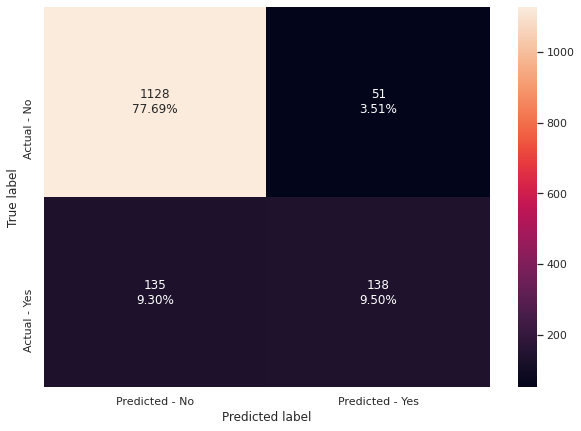

In [ ]:
make_confusion_matrix(gbc_tuned,y_test)

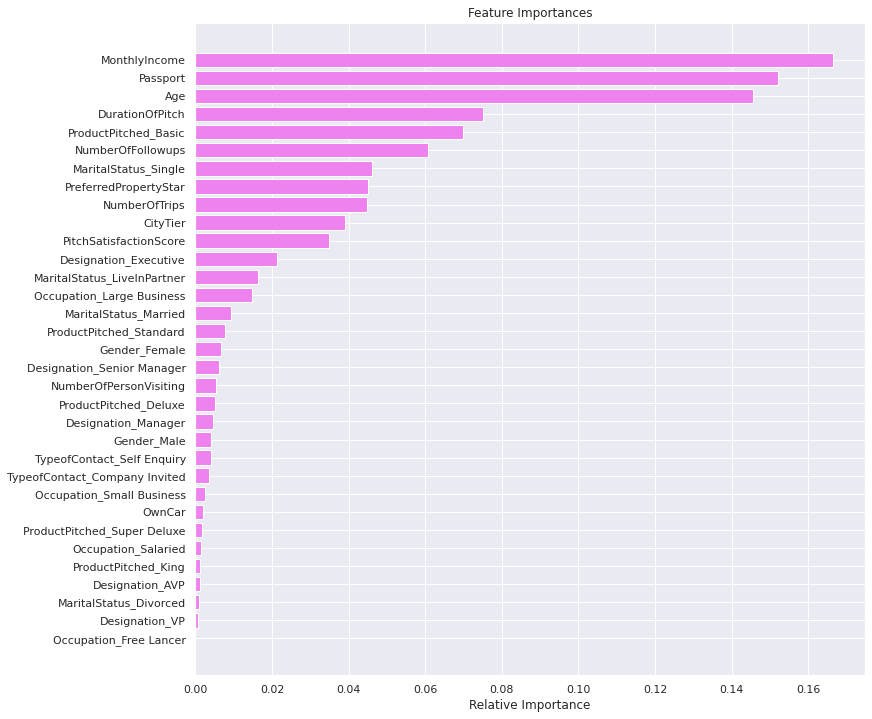

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The Tuned GB Classifier returned Monthly Income as the most Important Feature along with Passport, Age and Duration of Pitch

### XGBoost Classifier

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(20,120,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=40, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_tuned_acc = get_accuracy_score(xgb_tuned)
xgb_tuned_recall = get_recall_score(xgb_tuned)
xgb_tuned_precision = get_precision_score(xgb_tuned)

Accuracy on training set :  0.7477104874446086
Accuracy on test set :  0.7045454545454546
Recall on training set :  0.7978056426332288
Recall on test set :  0.7802197802197802
Precision on training set :  0.41247974068071314
Precision on test set :  0.36597938144329895


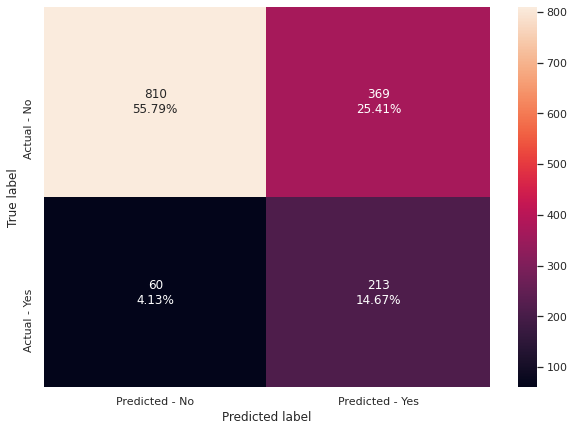

In [ ]:
make_confusion_matrix(xgb_tuned,y_test)

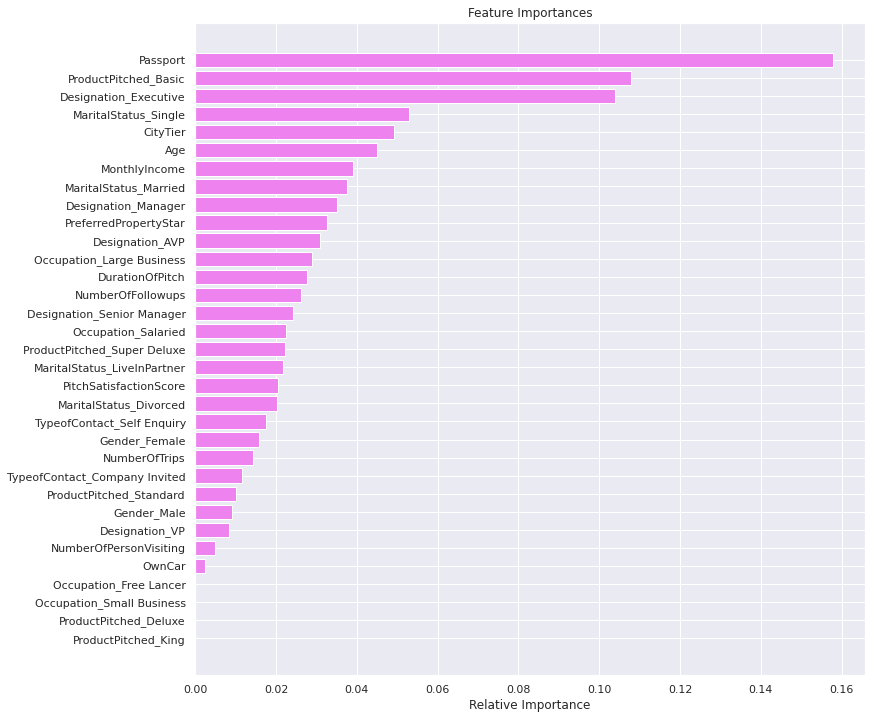

In [ ]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Stacking Model
* Now, let's build a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.

In [ ]:
estimators=[('Decision Tree', dtr_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1)

NameError: ignored

In [ ]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

In [ ]:
stacking_estimator_acc = get_accuracy_score(stacking_estimator)
stacking_estimator_recall = get_recall_score(stacking_estimator)
stacking_estimator_precision = get_precision_score(stacking_estimator)

In [ ]:
make_confusion_matrix(stacking_estimator,y_test)

In [ ]:
importances = stacking_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comparing all the models

In [ ]:
# defining list of models
models = [dtr,dtr_estimator,bagged,bagged_wt,bagged_estimator,rf,rf_wt,rf_estimator,ada,ada_tuned,gbc,gbc_tuned,xgbc,xgb_tuned,stacking_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Weighted Random Forest','Tuned Random Forest','AdaBoost Classifier',
                                          'Tuned Adaboost Classifier','Gradient Boost Classifier','Tuned Gradient Boost Classifier',
                                          'XGBoost Classifier','Tuned XGBoost Classifier','Stacking Estimator'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

* Tuned Decision tree performed well on training and test set.
* Bagging classifier overfitted the data before and after tuning.
* Random Forest with default parameters performed same as after tuning - As the final results depend on the parameters used/checked using GridSearchCV, There may be yet better parameters which may result in a better performance.

## Business Insights and Recommendations

* We have been able to build a predictive model that:
  
  a) the company can deploy to identify employees who are at the risk of attrition.
  
  b) the company can use to find the drivers of attrition. 
  
  c) based on which company can take appropriate actions to build better retention policies. 

* Factors that drive attrition - Monthly Income, Overtime, and Age.
* Monthly Income: Employees with lower income attrit more, which is also logical as they might get offers with higher pay in different organizations - the company should make sure that all employees are compensated based on industry standards.

* Overtime: Those employees who have to work overtime are the ones who attrite more - the company can provide some additional incentives to such employees to retain them.

* Age: Younger employees are the ones that attrite more- the company can make sure the new joiners have a friendly environment and better opportunities for excelling in their career.

* Distance From home is also an important factor for attrition - employees traveling more distance to reach the workplace then to attrit. For such employees, the company can provide transportation facilities so that the commute of employees gets easier. 

* As work-related travel frequency increases, Attrition rate also increases.

* Training doesn't seem to have an impact on attrition- the company needs to investigate more here, if training does not impact employee retention then better cost planning can be done.

* Employee with more experience and the employees working for most years in the company are the loyal ones and generally do not attrite.

* Highest attrition is in the Sales department more research should go into this to check what is wrong in the sales department.

* Our data collection technique is working well as the ratings given by employees in -Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, and Work-Life Balance shows a difference significant difference between attriting and non-attriting employees. These scales can act as a preliminary step to understand the dissatisfaction of employees - Lower the rating higher are the chances of attrition.